In [1]:
# importing required software packages

import numpy as np
import random
from random import randint
import time
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# "times" is a variable used to store the average number of the times data is generated and averaged upon
global times
times = 1

In [3]:
# function to generate input matrix
def createinputmatrix(n, d, numberofones):
    v = np.zeros([int(0.6*n), d])
    for i in range(int(0.6*n)):
        numones = randint(a = 1, b = numberofones)
        for j in range(numones):
            index = randint(a = 0, b = d-1)
            v[i, index] = 1
    for k in range(int(0.2*n)):
        v1 = np.zeros([d])
        v2 = np.zeros([d])
        innerproduct = randint(a = 170, b = numberofones)
        numones = randint(a = innerproduct, b = numberofones)
        for j in range(innerproduct):
            index = randint(a = 0, b = d-1)
            v1[index] = 1
            v2[index] = 1
        for l in range(numones-innerproduct):
            index = randint(a = 0, b = d-1)
            v1[index] = 1
        for l in range(numones-innerproduct):
            index = randint(a = 0, b = d-1)
            v2[index] = 1
        v = np.append(v, values = [v1, v2], axis = 0)
    return v

In [4]:
# auxiliary function to store compact information which used before compression

def convertocompact(matrix):
    compact = []
    for i in range(matrix.shape[0]):
        current = []
        for j in range(matrix.shape[1]):
            if(matrix[i][j]==1):
                current.append(j)
        compact.append(current)
    return compact

In [5]:
# Cosine Similarity formula used to compare two vectors in case of our BCS algorithm before and after compression

def getcosinesimilarity(a, b):
    innerproduct = np.inner(a,b)
    a1 = np.count_nonzero(a)
    b1 = np.count_nonzero(b)
    temp = np.sqrt(a1)*np.sqrt(b1)
    if temp!=0:
        cs = innerproduct/temp
    else:
        return 1
    return cs

In [6]:
# Cosine Similarity formula used to compare two vectors in case of Simhash algorithm after compression

def getcosinesimilaritySimhash(a, b):
    hammingdistance = np.count_nonzero(a!=b)
    cs = np.cos((np.pi/len(a))*hammingdistance) # length of a and b is equal
    return cs

In [7]:
# Cosine Similarity formula used to compare two vectors in case of Minhash algorithm after compression

def getcosinesimilarityMinhash(a, b):
    hammingdistance = np.count_nonzero(a!=b)
    R = 1 - (hammingdistance/len(a))  # length of a and b is equal
    cs = (2*R)/(R+1)
    return cs

In [8]:
# function containing implementation of the BCS algorithm

def ourtransform(reduceddim, matrix, n, d):
    timeforour = []
    start = time.time()
    mapping = []
    compressedmatrix = np.zeros([n,reduceddim])
    for i in range(d):
        toss = randint(0, reduceddim-1)
        mapping.append(toss)
    for i in range(n):
        vector = matrix[i]
        for j in vector:
            compressedmatrix[i][mapping[j]] += 1
        for j in vector:
            compressedmatrix[i][mapping[j]] = compressedmatrix[i][mapping[j]]%2
    end = time.time()
    totaltime = end - start
    timeforour.append(totaltime)
    return compressedmatrix,timeforour

In [9]:
# function containing implementation of the Minhash algorithm

def minhash(reduceddim, matrix, n, d):
    timeforminhash = []
    start = time.time()
    sigmatrix = np.zeros([n,reduceddim])
    for i in range (reduceddim):
        perm = np.random.permutation(d)
        for j in range(n):
            vector = matrix[j]
            l = []
            for k in vector:
                l.append(perm[k])
            sigmatrix[j][i] = min(l)
    end = time.time()
    timeforminhash.append(end-start)
    return sigmatrix,timeforminhash

In [10]:
# function containing implementation of the Simhash algorithm

def simhash(reduceddim, matrix, n, d):
    timeforsim = []
    start = time.time()
    sigmatrix = np.zeros([n,reduceddim])
    for i in range (reduceddim):
        rv = np.random.choice([1,-1], size=d, p=[0.5,0.5])
        for j in range(n):
            vector = matrix[j]
            ip = 0
            for k in vector:
                ip += rv[k]
            if(ip>0):
                sigmatrix[j][i] = 1
    end = time.time()
    #print(end-start)
    timeforsim.append(end-start)
    return sigmatrix,timeforsim

In [11]:
# function used for obtaining all pairs in a vector and finding the similarity measure between them

def getpairsets(matrix,method,flag):
    set02 = set([])
    set03 = set([])
    set04 = set([])
    set05 = set([])
    set06 = set([])
    set07 = set([])
    set08 = set([])
    set09 = set([])
    for i in range(matrix.shape[0]):
        vector = matrix[i]
        for j in range(i+1, matrix.shape[0]):
            if flag=="original":
                cs = getcosinesimilarity(vector, matrix[j])
            else:   #only other option is compressed
                if method=="bcs":
                    cs = getcosinesimilarity(vector, matrix[j])
                elif method=="minhash":
                    cs = getcosinesimilarityMinhash(vector, matrix[j])
                else:   #only other option is simhash
                    cs = getcosinesimilaritySimhash(vector, matrix[j])
                    
            if(cs >= 0.9):
                set09.add((i,j))
            if(cs >= 0.8):
                set08.add((i,j))
            if(cs >= 0.7):
                set07.add((i,j))
            if(cs >= 0.6):
                set06.add((i,j))
            if(cs >= 0.5):
                set05.add((i,j))
            if(cs >= 0.4):
                set04.add((i,j))
            if(cs >= 0.3):
                set03.add((i,j))
            if(cs >= 0.2):
                set02.add((i,j))
            
                
    return set02,set03,set04,set05,set06,set07,set08,set09
    

In [12]:
# function used to calculate accuracy given a vector and it's corresponding compressed vector

def calculateaccuracy(matrix, compressedmatrix, method):
    accuracyvar = []
    oset2,oset3,oset4,oset5,oset6,oset7,oset8,oset9 = getpairsets(matrix,method,"original")
    starttime = time.time()
    cset2,cset3,cset4,cset5,cset6,cset7,cset8,cset9 = getpairsets(compressedmatrix,method,"compressed")
    search_time = time.time()-starttime
    intersection2 = len(oset2.intersection(cset2))
    intersection3 = len(oset3.intersection(cset3))
    intersection4 = len(oset4.intersection(cset4))
    intersection5 = len(oset5.intersection(cset5))
    intersection6 = len(oset6.intersection(cset6))
    intersection7 = len(oset7.intersection(cset7))
    intersection8 = len(oset8.intersection(cset8))
    intersection9 = len(oset9.intersection(cset9))
    
    union2 = len(oset2.union(cset2))
    union3 = len(oset3.union(cset3))
    union4 = len(oset4.union(cset4))
    union5 = len(oset5.union(cset5))
    union6 = len(oset6.union(cset6))
    union7 = len(oset7.union(cset7))
    union8 = len(oset8.union(cset8))
    union9 = len(oset9.union(cset9))
    
    #print(oset2)
    #print(cset2)
    if(union2==0):
        accuracy2 = 1
    else:
        accuracy2 = intersection2/union2
        
    if(union3==0):
        accuracy3 = 1
    else:
        accuracy3 = intersection3/union3
        
    if(union4==0):
        accuracy4 = 1
    else:
        accuracy4 = intersection4/union4
        
    if(union5==0):
        accuracy5 = 1
    else:
        accuracy5 = intersection5/union5
    if(union6==0):
        accuracy6 = 1
    else:
        accuracy6 = intersection6/union6
        
    if(union7==0):
        accuracy7 = 1
    else:
        accuracy7 = intersection7/union7
        
    if(union8==0):
        accuracy8 = 1
    else:
        accuracy8 = intersection8/union8
        
    if(union9==0):
        accuracy9 = 1
    else:
        accuracy9 = intersection9/union9
        
    accuracyvar.append(accuracy2)
    accuracyvar.append(accuracy3)
    accuracyvar.append(accuracy4)
    accuracyvar.append(accuracy5)
    accuracyvar.append(accuracy6)
    accuracyvar.append(accuracy7)
    accuracyvar.append(accuracy8)
    accuracyvar.append(accuracy9)
    return accuracyvar,search_time

In [13]:
accuracyminhash = []

# "sparsity" contains different values of sparsity used to calculate accuracy and other measures given a compression length 
#  value 5000
sparsity = [200, 500, 1000, 2000, 3000, 4000, 7000, 9000, 10000]

# "dimsaftercompression" contains different values of compression length used to calculate accuracy and other measures given a 
#  sparsity value 200
dimsaftercompression = [50, 100, 500, 1000, 1200, 1500, 2000, 2500, 5000, 7000, 8000, 10000]

In [14]:
# function to calculate different metrics like accuracy, compression time and search time by varying compression length value &
# keeping sparsity constant

def getalldataourConstantSparsity(method1,method2,method3):
    accuracyBCS = []
    timeforourlist = []
    timeforsearchingpairs = [] # list for storing time values for obtaining all pairs on the compressed vector via BCS
    
    accuracyMinhash = []
    timeforMinhashlist = []
    timeforsearchingpairsMinhash = [] # list for storing time values for obtaining all pairs on the compressed vector via minhash
    
    accuracySimhash = []
    timeforSimhashlist = []
    timeforsearchingpairsSimhash = [] # list for storing time values for obtaining all pairs on the compressed vector via Simhash
    matrix = createinputmatrix(1000, 100000, 200)
    compactmatrix = convertocompact(matrix)
    for i in dimsaftercompression:
        print(i)
        #Calculating Accuracy, Compression time and Search time for BCS with constant Sparsity and varying Compression length
        compressedmatrix,timeforour = ourtransform(i, compactmatrix, matrix.shape[0], matrix.shape[1])
        timeforourlist.append(timeforour)
        accuracyBCStemp,search_time = calculateaccuracy(matrix, compressedmatrix, method1)
        accuracyBCS.append(accuracyBCStemp)
        timeforsearchingpairs.append(search_time)
        print("bcs")
        print(search_time)
        
        #Calculating Accuracy, Compression time and Search time for Minhash with constant Sparsity and varying Compression length
        compressedmatrix,timeforour = minhash(i, compactmatrix, matrix.shape[0], matrix.shape[1])
        timeforMinhashlist.append(timeforour)
        accuracyMinhashtemp,search_time = calculateaccuracy(matrix, compressedmatrix, method2)
        accuracyMinhash.append(accuracyMinhashtemp)
        timeforsearchingpairsMinhash.append(search_time)
        print("minhash")
        print(search_time)
        
        #Calculating Accuracy, Compression time and Search time for Simhash with constant Sparsity and varying Compression length
        compressedmatrix,timeforour = simhash(i, compactmatrix, matrix.shape[0], matrix.shape[1])
        timeforSimhashlist.append(timeforour)
        accuracySimhashtemp,search_time = calculateaccuracy(matrix, compressedmatrix, method3)
        accuracySimhash.append(accuracySimhashtemp)
        timeforsearchingpairsSimhash.append(search_time)
        print("simhash")
        print(search_time)
        
    return np.array(list(map(list,zip(*accuracyBCS)))),np.array(timeforourlist),np.array(timeforsearchingpairs), np.array(list(map(list,zip(*accuracyMinhash)))),np.array(timeforMinhashlist),np.array(timeforsearchingpairsMinhash),np.array(list(map(list,zip(*accuracySimhash)))),np.array(timeforSimhashlist),np.array(timeforsearchingpairsSimhash)
    
    

In [ ]:
# calling all necessary functions to calculate metrics like accuracy, compression time and search time

ouraccuconstsparsity = np.zeros([8,len(dimsaftercompression)])
timeforour = np.zeros([len(dimsaftercompression),1])
timeforsearchingpairs = np.zeros([len(dimsaftercompression)])

Minhashaccuconstsparsity = np.zeros([8,len(dimsaftercompression)])
timeforMinhash = np.zeros([len(dimsaftercompression),1])
timeforsearchingpairsMinhash = np.zeros([len(dimsaftercompression)])

Simhashaccuconstsparsity = np.zeros([8,len(dimsaftercompression)])
timeforSimhash = np.zeros([len(dimsaftercompression),1])
timeforsearchingpairsSimhash = np.zeros([len(dimsaftercompression)])
for i in range(times):
    print(i)
    ouraccuconstsparsitytemp,timeforourtemp,timeforsearchingpairstemp,Minhashaccuconstsparsitytemp,timeforMinhashtemp,timeforsearchingpairstempMinhash,Simhashaccuconstsparsitytemp,timeforSimhashtemp,timeforsearchingpairstempSimhash = getalldataourConstantSparsity("bcs","minhash","simhash")
    

    ouraccuconstsparsity = ouraccuconstsparsity + ouraccuconstsparsitytemp
    timeforour = timeforour + timeforourtemp
    timeforsearchingpairs = timeforsearchingpairs + timeforsearchingpairstemp
    
    Minhashaccuconstsparsity = Minhashaccuconstsparsity + Minhashaccuconstsparsitytemp
    timeforMinhash = timeforMinhash + timeforMinhashtemp
    timeforsearchingpairsMinhash = timeforsearchingpairsMinhash + timeforsearchingpairstempMinhash
    
    Simhashaccuconstsparsity = Simhashaccuconstsparsity + Simhashaccuconstsparsitytemp
    timeforSimhash = timeforSimhash + timeforSimhashtemp
    timeforsearchingpairsSimhash = timeforsearchingpairsSimhash + timeforsearchingpairstempSimhash

In [31]:
np.save("ouraccuconstsparsity.npy",ouraccuconstsparsity)
np.save("timeforour.npy",timeforour)
np.save("Minhashaccuconstsparsity.npy",Minhashaccuconstsparsity)
np.save("timeforMinhash.npy",timeforMinhash)
np.save("Simhashaccuconstsparsity.npy",Simhashaccuconstsparsity)
np.save("timeforSimhash.npy",timeforSimhash)

In [21]:
# function to plot accuracy values for different threshold values in the case of constant sparsity

def plotaccuracyconstsparsity(accuracy,method,name):    
    setof = [0.2,.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    plt.figure(figsize=(3,3))
    #for i in range(accuracy.shape[0]):
    for i in range(8):
        plt.plot(dimsaftercompression, accuracy[i], label = setof[i] )
    #plt.grid(b=True, which='major')
    
    #plt.xticks([0,1000,2000,3000,4000,5000])
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10)
    if method=='bcs':
        temp = 'bcs_'+name+'.jpg'
    elif method=='minhash':
        temp = 'minhash_'+name+'.jpg'
    else:
        temp = 'simhash_'+name+'.jpg'
    plt.xlabel('Compression Length')
    plt.ylabel('Accuracy')
    plt.legend(prop={'size':8},loc = 4)
    plt.savefig(temp, bbox_inches='tight')
    plt.show()

In [22]:
# function to plot compression time values for different threshold values in the case of constant sparsity

def plotcompressiontimetakenconstsparsity(timetaken,ylabel,method,name):    
    plt.figure(figsize=(3,3))
    plt.plot(dimsaftercompression, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,1,2,3,4,5,6,7,8])
    #if method=='bcs':
    #    plt.yticks([0,2,4,6,8,10])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.xlabel('Compression Length')
    plt.ylabel(ylabel)
    if method=='bcs':
        temp = 'bcs_'+name+'.jpg'
        plt.yticks([0,2,4,6,8,10])
    elif method=='minhash':
        temp = 'minhash_'+name+'.jpg'
    else:
        temp = 'simhash_'+name+'.jpg'
    plt.savefig(temp, bbox_inches='tight')
    
    plt.show()

    
# function to plot search time values for different threshold values in the case of constant sparsity

def plotsearchtimetakenconstsparsity(timetaken,ylabel,method,name):    
    plt.figure(figsize=(3,3))
    plt.plot(dimsaftercompression, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,1,2,3,4,5,6,7,8])
    #plt.yticks([0,0.5,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.5])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.xlabel('Compression Length')
    plt.ylabel(ylabel)
    if method=='bcs':
        temp = 'bcs_'+name+'.jpg'
    elif method=='minhash':
        temp = 'minhash_'+name+'.jpg'
        plt.yticks([0,2,4,6,8,10])
    else:
        temp = 'simhash_'+name+'.jpg'
        plt.yticks([0,2,4,6,8,10])
    plt.savefig(temp, bbox_inches='tight')
    
    plt.show()

Constant Sparsity
BCS


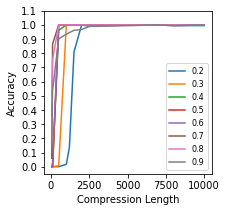

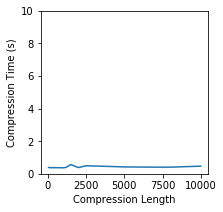

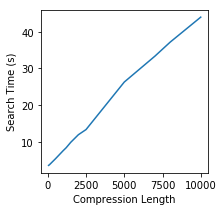

Minhash


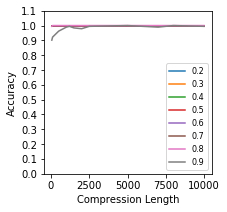

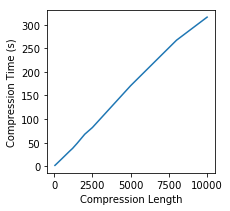

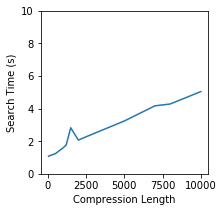

Simhash


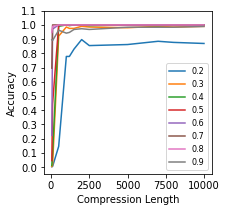

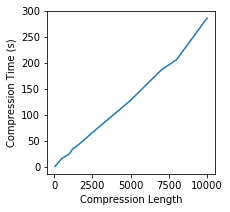

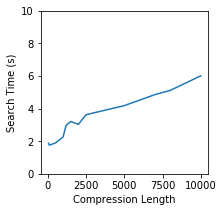

In [24]:
print("Constant Sparsity")

print("BCS")
plotaccuracyconstsparsity(ouraccuconstsparsity/times,'bcs','accuracyconstsparsity')
plotcompressiontimetakenconstsparsity(timeforour/times,'Compression Time (s)','bcs','compressiontimeconstsparsity')
plotsearchtimetakenconstsparsity(timeforsearchingpairs/times,'Search Time (s)','bcs','searchtimeconstsparsity')

print("Minhash")
plotaccuracyconstsparsity(Minhashaccuconstsparsity/times,'minhash','accuracyconstsparsity')
plotcompressiontimetakenconstsparsity(timeforMinhash/times,'Compression Time (s)','minhash','compressiontimeconstsparsity')
plotsearchtimetakenconstsparsity(timeforsearchingpairsMinhash/times,'Search Time (s)','minhash','searchtimeconstsparsity')

print("Simhash")
plotaccuracyconstsparsity(Simhashaccuconstsparsity/times,'simhash','accuracyconstsparsity')
plotcompressiontimetakenconstsparsity(timeforSimhash/times,'Compression Time (s)','simhash','compressiontimeconstsparsity')
plotsearchtimetakenconstsparsity(timeforsearchingpairsSimhash/times,'Search Time (s)','simhash','searchtimeconstsparsity')

In [19]:
# function to calculate different metrics like accuracy, compression time and search time by varying sparsity and
# keeping compression length value constant

def getalldataourConstantCompresseddimension(method1,method2,method3):
    accuracyBCS = []
    timeforourlist = []
    timeforsearchingpairs = [] # list for storing time values for obtaining all pairs on the compressed vector via BCS
    
    accuracyMinhash = []
    timeforMinhashlist = []
    timeforsearchingpairsMinhash = [] # list for storing time values for obtaining all pairs on the compressed vector via minhash
    
    accuracySimhash = []
    timeforSimhashlist = []
    timeforsearchingpairsSimhash = [] # list for storing time values for obtaining all pairs on the compressed vector via Simhash
    
    
    
    for i in sparsity: 
        matrix = createinputmatrix(1000, 100000, i)
        compactmatrix = convertocompact(matrix)
        print(i)
        
        #Calculating Accuracy, Compression time and Search time for BCS with varying Sparsity and constant Compression length
        compressedmatrix,timeforour = ourtransform(5000, compactmatrix, matrix.shape[0], matrix.shape[1])
        timeforourlist.append(timeforour)
        accuracyBCStemp,search_time = calculateaccuracy(matrix, compressedmatrix, method1)
        accuracyBCS.append(accuracyBCStemp)
        timeforsearchingpairs.append(search_time)
        print("bcs")
        print(search_time)
        
        #Calculating Accuracy, Compression time and Search time for Minhash with varying Sparsity and constant Compression length
        compressedmatrix,timeforour = minhash(5000, compactmatrix, matrix.shape[0], matrix.shape[1])
        timeforMinhashlist.append(timeforour)
        accuracyMinhashtemp,search_time = calculateaccuracy(matrix, compressedmatrix, method2)
        accuracyMinhash.append(accuracyMinhashtemp)
        timeforsearchingpairsMinhash.append(search_time)
        print("minhash")

        
        #Calculating Accuracy, Compression time and Search time for Simhash with varying Sparsity and constant Compression length
        compressedmatrix,timeforour = simhash(5000, compactmatrix, matrix.shape[0], matrix.shape[1])
        timeforSimhashlist.append(timeforour)
        accuracySimhashtemp,search_time = calculateaccuracy(matrix, compressedmatrix, method3)
        accuracySimhash.append(accuracySimhashtemp)
        timeforsearchingpairsSimhash.append(search_time)
        print("simhash")
        
        
    return np.array(list(map(list,zip(*accuracyBCS)))),np.array(timeforourlist),np.array(timeforsearchingpairs), np.array(list(map(list,zip(*accuracyMinhash)))),np.array(timeforMinhashlist),np.array(timeforsearchingpairsMinhash),np.array(list(map(list,zip(*accuracySimhash)))),np.array(timeforSimhashlist),np.array(timeforsearchingpairsSimhash)
    

In [ ]:
# calling all necessary functions to calculate metrics like accuracy, compression time and search time

ouraccuconstdimension_sp = np.zeros([8,len(sparsity)])
timeforour_sp = np.zeros([len(sparsity),1])
timeforsearchingpairs_sp = np.zeros([len(sparsity)])

Minhashaccuconstdimension_sp = np.zeros([8,len(sparsity)])
timeforMinhash_sp = np.zeros([len(sparsity),1])
timeforsearchingpairsMinhash_sp = np.zeros([len(sparsity)])

Simhashaccuconstdimension_sp = np.zeros([8,len(sparsity)])
timeforSimhash_sp = np.zeros([len(sparsity),1])
timeforsearchingpairsSimhash_sp = np.zeros([len(sparsity)])

for i in range(times):
    print(i)
    ouraccuconstdimensiontemp,timeforourtemp,timeforsearchingpairstemp,Minhashaccuconstdimensiontemp,timeforMinhashtemp,timeforsearchingpairstempMinhash,Simhashaccuconstdimensiontemp,timeforSimhashtemp,timeforsearchingpairstempSimhash = getalldataourConstantCompresseddimension("bcs","minhash","simhash")

    
    ouraccuconstdimension_sp = ouraccuconstdimension_sp + ouraccuconstdimensiontemp
    timeforour_sp = timeforour_sp + timeforourtemp
    timeforsearchingpairs_sp = timeforsearchingpairs_sp + timeforsearchingpairstemp
    
    Minhashaccuconstdimension_sp = Minhashaccuconstdimension_sp + Minhashaccuconstdimensiontemp
    timeforMinhash_sp = timeforMinhash_sp + timeforMinhashtemp
    timeforsearchingpairsMinhash_sp = timeforsearchingpairsMinhash_sp + timeforsearchingpairstempMinhash
    
    Simhashaccuconstdimension_sp = Simhashaccuconstdimension_sp + Simhashaccuconstdimensiontemp
    timeforSimhash_sp = timeforSimhash_sp + timeforSimhashtemp
    timeforsearchingpairsSimhash_sp = timeforsearchingpairsSimhash_sp + timeforsearchingpairstempSimhash

In [ ]:
# function to plot accuracy values for different threshold values in the case of constant compression length

def plotaccuracyconstdimension(accuracy,method,name):    
    setof = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    plt.figure(figsize=(3,3))
    #for i in range(accuracy.shape[0]):
    for i in range(8):
        plt.plot(sparsity, accuracy[i], label = setof[i] )
    #plt.grid(b=True, which='major')
    
    #plt.xticks([0,1000,2000,3000,4000,5000])
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10)
    if method=='bcs':
        temp = 'bcs_'+name+'.jpg'
    elif method=='minhash':
        temp = 'minhash_'+name+'.jpg'
    else:
        temp = 'simhash_'+name+'.jpg'
    plt.xlabel('Sparsity')
    plt.ylabel('Accuracy')
    plt.legend(prop={'size':8},loc = 4)
    plt.savefig(temp, bbox_inches='tight')
    plt.show()

In [ ]:
ouraccuconstdimension_sp.shape

In [ ]:
# function to plot compression time values for different threshold values in the case of constant compression length

def plotcompressiontimetakenconstdimension(timetaken,ylabel,method,name):    
    plt.figure(figsize=(3,3))
    plt.plot(sparsity, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,100,200,300,400,500,600])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    if method=='bcs':
        temp = 'bcs_'+name+'.jpg'
        plt.yticks([0,2,4,6,8,10])
    elif method=='minhash':
        temp = 'minhash_'+name+'.jpg'
        plt.yticks([0,1000,2000,3000,4000,5000,6000,7000])
    else:
        temp = 'simhash_'+name+'.jpg'
    plt.xlabel('Sparsity')
    plt.ylabel(ylabel)
    plt.savefig(temp, bbox_inches='tight')
    
    plt.show()

    
# function to plot search time values for different threshold values in the case of constant compression length


def plotsearchtimetakenconstdimension(timetaken,ylabel,method,name):    
    plt.figure(figsize=(3,3))
    plt.plot(sparsity, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,0.01,0.02,0.03,0.04,0.05,0.06])
    if method=='bcs':
        temp = 'bcs_'+name+'.jpg'
    elif method=='minhash':
        temp = 'minhash_'+name+'.jpg'
        plt.yticks([0,2,4,6,8,10])
    else:
        temp = 'simhash_'+name+'.jpg'
        plt.yticks([0,2,4,6,8,10])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.xlabel('Sparsity')
    plt.ylabel(ylabel)
    plt.savefig(temp, bbox_inches='tight')
    
    plt.show()

In [ ]:

print("Constant Compressed length")

print("BCS")
plotaccuracyconstdimension(ouraccuconstdimension_sp/times,'bcs','accuracyconstdim')
plotcompressiontimetakenconstdimension(timeforour_sp/times,'Compression Time (s)','bcs','compressiontimeconstdim')
plotsearchtimetakenconstdimension(timeforsearchingpairs_sp/times,'Search Time (s)','bcs','searchtimeconstdim')

print("Minhash")
plotaccuracyconstdimension(Minhashaccuconstdimension_sp/times,'minhash','accuracyconstdim')
plotcompressiontimetakenconstdimension(timeforMinhash_sp/times,'Compression Time (s)','minhash','compressiontimeconstdim')
plotsearchtimetakenconstdimension(timeforsearchingpairsMinhash_sp/times,'Search Time (s)','minhash','searchtimeconstdim')

print("Simhash")
plotaccuracyconstdimension(Simhashaccuconstdimension_sp/times,'simhash','accuracyconstdim')
plotcompressiontimetakenconstdimension(timeforSimhash_sp/times,'Compression Time (s)','simhash','compressiontimeconstdim')
plotsearchtimetakenconstdimension(timeforsearchingpairsSimhash_sp/times,'Search Time (s)','simhash','searchtimeconstdim')